In [1]:
import pickle
import os

from pipeline import cluster_explanations


def load_explanations(filename):
    if not os.path.exists(filename):
        raise FileNotFoundError(f'file not found: {filename}')

    with open(filename, 'rb') as pickle_file:
        return pickle.load(pickle_file)



In [2]:
%time
run = load_explanations('outputs/run_1_8.pickle')

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [3]:
#print(run)

In [4]:
import numpy as np
np.unique(run['y_tst_hw'])

array([0., 1., 2., 3., 4., 5., 6., 7., 9.])

In [5]:
run['y_tst_hw'].shape

(10000, 1)

In [6]:
# get the cluster labels
#cluster_lbls = cluster_explanations(run['shaps'], run['y_tst_hw'] == run['pair'][0], run['pair'][0], 0.004)
variances, cluster_lbls = cluster_explanations(run['shaps'], run['y_tst_hw'] == 0, 0, 0.006)

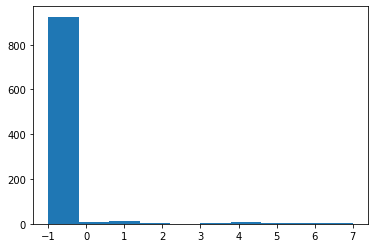

In [7]:
import matplotlib.pyplot as plt

# LIES! the bins are too wide
plt.hist(cluster_lbls)
plt.show()

In [8]:
print(''.join([str(v + 1) for v in cluster_lbls]))

00100000000230000000000000500000000020000000000000000000000000000000000006000300000000000000000000000000005000000000000000000008000000000000000000000020000000000000000000000000000006040000000000200000000000000000000000000000000000000000000000400000000000000080100100000000000004000000000000000080000010000000000000100000020000000000000000000000000000000000000000500050000000000000000000000000100000000003000000000502007000000000000000200000000000000000000000000000000000000000000000000000000000050005060000000000003100000002000004000000000000000000000000020080000000000000000000000000000000000000000000003000000007000000000000000000000000000000000000000000000000000000050065000000000000000000000000000000000000000000070000700000000101000400022000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000008000000200000000000000000000000007000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000600000000


In [9]:
def quickhist(data):
    for i in np.unique(data):
        print('{}:\t{}'.format(
            i,
            np.count_nonzero(data == i)
        ))

quickhist(cluster_lbls)

-1:	925
0:	9
1:	12
2:	5
3:	5
4:	9
5:	5
6:	5
7:	5


In [10]:
np.sum(variances)

0.001615979290323308

# Variances

for hotwire: `0.004742546638523787`  
for normal:  `0.001615979290323308`

significantly higher!